In [1]:
import pandas as pd
import numpy as np
import math
import json
% matplotlib inline

from matplotlib import pyplot as plt

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [2]:
portfolio

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2


In [3]:
profile

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN
5,68,20180426,M,e2127556f4f64592b11af22de27a7932,70000.0
6,118,20170925,None,8ec6ce2a7e7949b1bf142def7d0e0586,NaN
7,118,20171002,None,68617ca6246f4fbc85e91a2a49552598,NaN
8,65,20180209,M,389bc3fa690240e798340f5a15918d5c,53000.0
9,118,20161122,None,8974fc5686fe429db53ddde067b88302,NaN


In [4]:
transcript

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}
5,offer received,389bc3fa690240e798340f5a15918d5c,0,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}
6,offer received,c4863c7985cf408faee930f111475da3,0,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}
7,offer received,2eeac8d8feae4a8cad5a6af0499a211d,0,{'offer id': '3f207df678b143eea3cee63160fa8bed'}
8,offer received,aa4862eba776480b8bb9c68455b8c2e1,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
9,offer received,31dda685af34476cad5bc968bdb01c53,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}


In [5]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
event     306534 non-null object
person    306534 non-null object
time      306534 non-null int64
value     306534 non-null object
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [6]:
# Types of events in the transcript dataset
transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

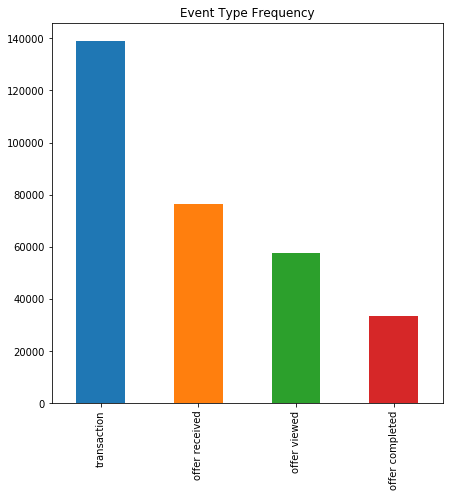

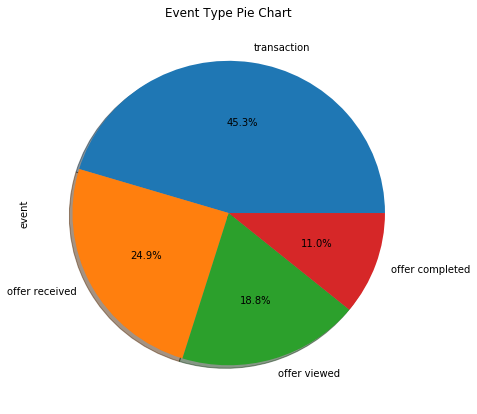

In [7]:

# Create a bar graph of the transcript dataset's quantitative columns to explore offer characteristics
fig = plt.figure()
transcript.event.value_counts().plot.bar(figsize=(7, 7), 
                                         title="Event Type Frequency")

fig = plt.figure()
transcript.event.value_counts().plot.pie(figsize=(7, 7), 
                                       title="Event Type Pie Chart", 
                                       autopct='%.1f%%', 
                                       shadow=True)

In [8]:

# See list of dictionary keys in the value column. Is 'offer_id' the only entry?
valueKeys = transcript.value.apply(lambda x: str(list(x.keys())))

In [9]:
# Cross reference value keys with event types to determine which value keys align with which event types.
pd.crosstab(valueKeys, transcript['event'])

event,offer completed,offer received,offer viewed,transaction
value,,,,
['amount'],0,0,0,138953
['offer id'],0,76277,57725,0
"['offer_id', 'reward']",33579,0,0,0


In [10]:
# View examples of successfully completed offers
transcript[transcript.event == 'offer completed'].head(10)

,event,person,time,value
12658,offer completed,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,0,{'offer_id': '2906b810c7d4411798c6938adc9daaa5...
12672,offer completed,fe97aa22dd3e48c8b143116a8403dd52,0,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...
12679,offer completed,629fc02d56414d91bca360decdfa9288,0,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...
12692,offer completed,676506bad68e4161b9bbaffeb039626b,0,{'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...
12697,offer completed,8f7dd3b2afe14c078eb4f6e6fe4ba97d,0,{'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0...
12717,offer completed,227f2d69e46a4899b70d48182822cff6,0,{'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0...
12721,offer completed,bb0f25e23a4c4de6a645527c275cd594,0,{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...
12744,offer completed,d72d201be5794279aa716d8ad82b8d90,0,{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d...
12764,offer completed,73ffefd41e9a4ca3ab26b2b3697c6eb7,0,{'offer_id': '2906b810c7d4411798c6938adc9daaa5...
12767,offer completed,3e621194f72e40d7a0b695ee9b7c38b7,0,{'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0...


In [11]:
# View examples of a randomly chosen customer
transcript[transcript.person == 'bb0f25e23a4c4de6a645527c275cd594']
     

,event,person,time,value
317,offer received,bb0f25e23a4c4de6a645527c275cd594,0,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}
12720,transaction,bb0f25e23a4c4de6a645527c275cd594,0,{'amount': 28.08}
12721,offer completed,bb0f25e23a4c4de6a645527c275cd594,0,{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...
40812,offer viewed,bb0f25e23a4c4de6a645527c275cd594,96,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}
52288,transaction,bb0f25e23a4c4de6a645527c275cd594,162,{'amount': 21.62}
53492,offer received,bb0f25e23a4c4de6a645527c275cd594,168,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
74855,offer viewed,bb0f25e23a4c4de6a645527c275cd594,186,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
97732,transaction,bb0f25e23a4c4de6a645527c275cd594,264,{'amount': 35.95}
97733,offer completed,bb0f25e23a4c4de6a645527c275cd594,264,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...
150932,offer received,bb0f25e23a4c4de6a645527c275cd594,408,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}


Need to figure out how to make list of whether each offer is viewed and completed. Figure out the resulting transaction amount.

Loop through each person to analyze transactions

In [12]:
def trancriptTransform(transcript):
  
  transcript = transcript.join(pd.DataFrame.from_records(transcript.pop('value')))
  transcript.offer_id.update(transcript.pop('offer id'))

  # Rename 'if' to 'customer_id'
  transcript.rename(columns={'person': 'customer_id'}, inplace=True)
  
  # Convert 'time' from hours to days
  transcript['time_days'] = transcript['time'] / 24

  # Drop the time column
  transcript.drop(['time'], axis=1, inplace=True)

  return transcript

In [13]:
transcript = trancriptTransform(transcript)
transcript

,event,customer_id,amount,offer_id,reward,time_days
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,0.00
1,offer received,a03223e636434f42ac4c3df47e8bac43,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,0.00
2,offer received,e2127556f4f64592b11af22de27a7932,NaN,2906b810c7d4411798c6938adc9daaa5,NaN,0.00
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN,0.00
4,offer received,68617ca6246f4fbc85e91a2a49552598,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,0.00
5,offer received,389bc3fa690240e798340f5a15918d5c,NaN,f19421c1d4aa40978ebb69ca19b0e20d,NaN,0.00
6,offer received,c4863c7985cf408faee930f111475da3,NaN,2298d6c36e964ae4a3e7e9706d1fb8c2,NaN,0.00
7,offer received,2eeac8d8feae4a8cad5a6af0499a211d,NaN,3f207df678b143eea3cee63160fa8bed,NaN,0.00
8,offer received,aa4862eba776480b8bb9c68455b8c2e1,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,0.00
9,offer received,31dda685af34476cad5bc968bdb01c53,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,0.00


In [14]:
transcript[transcript.event == 'offer received']

,event,customer_id,amount,offer_id,reward,time_days
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,0.0
1,offer received,a03223e636434f42ac4c3df47e8bac43,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,0.0
2,offer received,e2127556f4f64592b11af22de27a7932,NaN,2906b810c7d4411798c6938adc9daaa5,NaN,0.0
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN,0.0
4,offer received,68617ca6246f4fbc85e91a2a49552598,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,0.0
5,offer received,389bc3fa690240e798340f5a15918d5c,NaN,f19421c1d4aa40978ebb69ca19b0e20d,NaN,0.0
6,offer received,c4863c7985cf408faee930f111475da3,NaN,2298d6c36e964ae4a3e7e9706d1fb8c2,NaN,0.0
7,offer received,2eeac8d8feae4a8cad5a6af0499a211d,NaN,3f207df678b143eea3cee63160fa8bed,NaN,0.0
8,offer received,aa4862eba776480b8bb9c68455b8c2e1,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,0.0
9,offer received,31dda685af34476cad5bc968bdb01c53,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,0.0


In [15]:
# View examples of a randomly chosen customer
transcript[transcript.customer_id	 == 'bb0f25e23a4c4de6a645527c275cd594']

,event,customer_id,amount,offer_id,reward,time_days
317,offer received,bb0f25e23a4c4de6a645527c275cd594,NaN,2298d6c36e964ae4a3e7e9706d1fb8c2,NaN,0.00
12720,transaction,bb0f25e23a4c4de6a645527c275cd594,28.08,NaN,NaN,0.00
12721,offer completed,bb0f25e23a4c4de6a645527c275cd594,NaN,2298d6c36e964ae4a3e7e9706d1fb8c2,3.0,0.00
40812,offer viewed,bb0f25e23a4c4de6a645527c275cd594,NaN,2298d6c36e964ae4a3e7e9706d1fb8c2,NaN,4.00
52288,transaction,bb0f25e23a4c4de6a645527c275cd594,21.62,NaN,NaN,6.75
53492,offer received,bb0f25e23a4c4de6a645527c275cd594,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,7.00
74855,offer viewed,bb0f25e23a4c4de6a645527c275cd594,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,7.75
97732,transaction,bb0f25e23a4c4de6a645527c275cd594,35.95,NaN,NaN,11.00
97733,offer completed,bb0f25e23a4c4de6a645527c275cd594,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,11.00
150932,offer received,bb0f25e23a4c4de6a645527c275cd594,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,17.00


. For each customer in the profile data set, get all transactions
. For each ‘offer received’, see whether offer is viewed (# of times viewed) and whether it is completed within the offer time period
    . Get all of events that match the customer_id & offer_id for that received offer
    . Get offer duration time and determine times that offer is valid
. Sum the amount spent during the offer period

In [17]:
# Loop through each person to calulate the frequency of 'offer viewed' and 'offer completed' combinations. 
# Also keep track of transactions that occur without an offer received

# Calculate boolean masks of the indices which contain 'offer received', 'offer viewed', and 'offer completed' values:
received_mask = (transcript.event == 'offer received')
viewed_mask = (transcript.event == 'offer viewed')
completed_mask = (transcript.event == 'offer completed')
tranaction_mask = (transcript.event == 'transaction')

a = profile[profile.id == 'bb0f25e23a4c4de6a645527c275cd594'].index
#a = profile[profile.id == '78afa995795e4d85b5d9ceeca43f5fef'].index

if 'offer_completed' not in transcript.columns:
  transcript.insert(loc=len(transcript.columns), column='offer_completed', value=np.zeros_like(transcript.index))

if 'offer_viewed' not in transcript.columns:
  transcript.insert(loc=len(transcript.columns), column='offer_viewed', value=np.zeros_like(transcript.index))

if 'offer_compViewed' not in transcript.columns:
  transcript.insert(loc=len(transcript.columns), column='offer_compViewed', value=np.zeros_like(transcript.index))

if 'offer_compNotViewed' not in transcript.columns:
  transcript.insert(loc=len(transcript.columns), column='offer_compNotViewed', value=np.zeros_like(transcript.index))

if 'compTransAmt' not in transcript.columns:
  transcript.insert(loc=len(transcript.columns), column='compTransAmt', value=np.zeros_like(transcript.index))

if 'rewardReceived' not in transcript.columns:
  transcript.insert(loc=len(transcript.columns), column='rewardReceived', value=np.zeros_like(transcript.index))

if 'adjRev' not in transcript.columns:
  transcript.insert(loc=len(transcript.columns), column='adjRev', value=np.zeros_like(transcript.index))

if 'offerTrans' not in transcript.columns:
  transcript.insert(loc=len(transcript.columns), column='offerTrans', value=np.zeros_like(transcript.index))

# Create a dictionary of 'offer_id' and offer durations
offerDurations = dict(zip(portfolio.id,portfolio.duration))

for i in profile.index:
  #print('i:',i)

  person = profile.id[i]
  person_mask = (transcript.customer_id == person)  

  received_indices = transcript.index[person_mask & received_mask]
  viewed_indices = transcript.index[person_mask & viewed_mask]
  completed_indices = transcript.index[person_mask & completed_mask]
  transaction_indices = transcript.index[person_mask & tranaction_mask]

  # checking for received offers and their times
  received_ids = transcript.offer_id[received_indices].values
  received_times = transcript.time_days[received_indices].values

  # Get the duration of each offer
  duration_times = [offerDurations[x] for x in received_ids]
  receivedEnd_times = received_times + duration_times

  #print('Received:')
  #print('Received ids:',received_ids)
  #print('Received times:',received_times)
  #print('Received durations:',duration_times)
  #print('Received end times:',receivedEnd_times)

  # checking for completed offers whether they were completed before or after they were viewed:
  viewed_ids = transcript.offer_id[viewed_indices].values
  viewed_times = transcript.time_days[viewed_indices].values

  #print('Viewed:')
  #print(viewed_ids)
  #print(viewed_times)

  completed_ids = transcript.offer_id[completed_indices].values
  completed_times = transcript.time_days[completed_indices].values
  completed_rewards = transcript.reward[completed_indices].values

  #print('Completed:')
  #print(completed_ids)
  #print(completed_times)
  #print(completed_rewards)

  transaction_amounts = transcript.amount[transaction_indices].values
  transaction_times = transcript.time_days[transaction_indices].values

  #print('Transactions:')
  #print(transaction_amounts)
  #print(transaction_times)

  for j, recId in enumerate(received_ids):

    # Get the duration, begin time, and end time of current offer
    offerBegin = received_times[j]
    offerEnd = receivedEnd_times[j]
    
    # Create a time mask for current offer
    #timeBegin_mask = (transcript[person_mask].time_days >= offerBegin)
    #timeEnd_mask = (transcript[person_mask].time_days < offerEnd)
    #time_mask = (timeBegin_mask & timeEnd_mask)
    #timeOffer_mask = offer_mask & time_mask

    # Create offer mask for current offer
    #offer_mask = (transcript[person_mask].offer_id == recId) 
    #personOffer_mask = time_mask # (offer_mask & person_mask)

    # Get sum of transaction ammount during offer period
    offerTrans_mask = (transaction_times >= offerBegin) & (transaction_times <= offerEnd)
    #offerTrans = transaction_amounts[offerTrans_mask]
    #offerTransSum = sum(compTrans)
    transcript.iloc[[received_indices[j]],13] = sum(transaction_amounts[offerTrans_mask])

    # Check to see whether an offer was viewed
    if (recId in viewed_ids):
      view_mask = (viewed_ids == recId) & (viewed_times >= offerBegin) & (viewed_times <= offerEnd)
      offerViews = sum(view_mask)
      if offerViews > 0:
        transcript.iloc[[received_indices[j]],7] = 1

    # Check to see whether an offer was completed
    if (recId in completed_ids):
      #print(recId)

      # Match the recId to the completed offer
      compOffer_mask = (completed_ids == recId) & (completed_times >= offerBegin) & (completed_times <= offerEnd)
      #print('completed_rewards',completed_rewards)
      #print(completed_rewards[compOffer_mask])
      #print('Completed times:',completed_times[compOffer_mask][0])
      #print('Completed rewards:',completed_rewards[compOffer_mask][0])

      #print('sum(compOffer_mask)',sum(compOffer_mask))

      # Match the recId to the completed offer
      compOffer_mask = (completed_ids == recId) & (completed_times >= offerBegin) & (completed_times <= offerEnd)

      # If an offer was completed
      if sum(compOffer_mask) > 0:
        # Get reward ammount and time for completed offer
        compOfferReward = completed_rewards[compOffer_mask][0]
        compOfferTime = completed_times[compOffer_mask][0]

        # Mark the the received offer was completed in the transcript data set
        transcript.iloc[[received_indices[j]],6] = 1

        # Record reward of completed offer
        transcript.iloc[[received_indices[j]],11] = compOfferReward

        # Get sum of transaction ammount during completed offer period
        compTrans_mask = (transaction_times >= offerBegin) & (transaction_times <= compOfferTime)
        compTrans = transaction_amounts[compTrans_mask]
        compTransSum = sum(compTrans)

        ## Update transcript table
        transcript.iloc[[received_indices[j]],10] = compTransSum
        transcript.iloc[[received_indices[j]],12] = compTransSum - compOfferReward

        # Check to see whether an offer was viewed and viewed before completed
        if (recId in viewed_ids):
          compView_mask = (viewed_ids == recId) & (viewed_times >= offerBegin) & (viewed_times <= compOfferTime)
          compView = sum(compView_mask)
          #print(compView_mask)
          if compView > 0:
            transcript.iloc[[received_indices[j]],8] = sum(compView_mask)
            #print('Offer viewed and then completed')
          else:
            transcript.iloc[[received_indices[j]],9] = 1
        else:
          # Offer completed, but not viewed
          transcript.iloc[[received_indices[j]],9] = 1

  #printing progress:
  if (i%100 == 0):
    print('{} out of {} is done'.format(i, len(profile.index)))


0 out of 17000 is done
100 out of 17000 is done
200 out of 17000 is done
300 out of 17000 is done
400 out of 17000 is done
500 out of 17000 is done
600 out of 17000 is done
700 out of 17000 is done
800 out of 17000 is done
900 out of 17000 is done
1000 out of 17000 is done
1100 out of 17000 is done
1200 out of 17000 is done
1300 out of 17000 is done
1400 out of 17000 is done
1500 out of 17000 is done
1600 out of 17000 is done
1700 out of 17000 is done
1800 out of 17000 is done
1900 out of 17000 is done
2000 out of 17000 is done
2100 out of 17000 is done
2200 out of 17000 is done
2300 out of 17000 is done
2400 out of 17000 is done
2500 out of 17000 is done
2600 out of 17000 is done
2700 out of 17000 is done
2800 out of 17000 is done
2900 out of 17000 is done
3000 out of 17000 is done
3100 out of 17000 is done
3200 out of 17000 is done
3300 out of 17000 is done
3400 out of 17000 is done
3500 out of 17000 is done
3600 out of 17000 is done
3700 out of 17000 is done
3800 out of 17000 is don

In [18]:
transcript[person_mask].head(20)

,event,customer_id,amount,offer_id,reward,time_days,offer_completed,offer_viewed,offer_compViewed,offer_compNotViewed,compTransAmt,rewardReceived,adjRev,offerTrans
12649,offer received,e4052622e5ba45a8b96b59aba68cf068,NaN,2298d6c36e964ae4a3e7e9706d1fb8c2,NaN,0.00,1,1,1,0,21.55,3.0,18.55,68.27
18066,offer viewed,e4052622e5ba45a8b96b59aba68cf068,NaN,2298d6c36e964ae4a3e7e9706d1fb8c2,NaN,0.25,0,0,0,0,0.00,0.0,0.00,0.00
32623,transaction,e4052622e5ba45a8b96b59aba68cf068,21.55,NaN,NaN,2.25,0,0,0,0,0.00,0.0,0.00,0.00
32624,offer completed,e4052622e5ba45a8b96b59aba68cf068,NaN,2298d6c36e964ae4a3e7e9706d1fb8c2,3.0,2.25,0,0,0,0,0.00,0.0,0.00,0.00
39543,transaction,e4052622e5ba45a8b96b59aba68cf068,25.19,NaN,NaN,3.50,0,0,0,0,0.00,0.0,0.00,0.00
42026,transaction,e4052622e5ba45a8b96b59aba68cf068,21.53,NaN,NaN,4.00,0,0,0,0,0.00,0.0,0.00,0.00
123538,offer received,e4052622e5ba45a8b96b59aba68cf068,NaN,3f207df678b143eea3cee63160fa8bed,NaN,14.00,0,0,0,0,0.00,0.0,0.00,0.00
163373,offer received,e4052622e5ba45a8b96b59aba68cf068,NaN,f19421c1d4aa40978ebb69ca19b0e20d,NaN,17.00,1,0,0,1,30.57,5.0,25.57,50.04
196833,transaction,e4052622e5ba45a8b96b59aba68cf068,30.57,NaN,NaN,20.00,0,0,0,0,0.00,0.0,0.00,0.00
196834,offer completed,e4052622e5ba45a8b96b59aba68cf068,NaN,f19421c1d4aa40978ebb69ca19b0e20d,5.0,20.00,0,0,0,0,0.00,0.0,0.00,0.00


In [19]:
# Get indices of completed offers
offerCompIdx = transcript[transcript.event == 'offer completed'].index.tolist()
  
# Statistics describing the reward amounts
transcript.iloc[offerCompIdx].reward.describe()

count    33579.000000
mean         4.904137
std          2.886647
min          2.000000
25%          2.000000
50%          5.000000
75%          5.000000
max         10.000000
Name: reward, dtype: float64

Text(0.5,1,'Frequency of Reward Amounts')

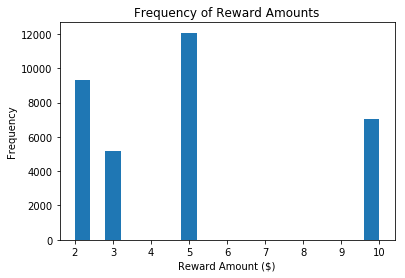

In [20]:

fig = plt.figure()
ax = transcript.iloc[offerCompIdx].reward.plot.hist(bins=20)
plt.xlabel('Reward Amount ($)')
plt.ylabel('Frequency')
plt.title('Frequency of Reward Amounts')

In [21]:
transcript.to_pickle("./dummy_v2.pkl")

In [22]:
transcriptTransformRec = transcript[transcript.event == 'offer received']